In [2]:
import pandas as pd

In [3]:
df8 = pd.DataFrame({
    'customer_id': [1, 2, 1, 3, 4],
    'email': ['alice@example.com', 'bob@example.com', 'alice@example.com', 'charlie@example.com', 'david@example.com'],
    'purchase': [50.0, 75.5, 50.0, 100.0, 25.5],
    'category': ['Electronics', 'Books', 'Electronics', 'Clothing', 'Books']
})

In [4]:
df8

,customer_id,email,purchase,category
0,1,alice@example.com,50.0,Electronics
1,2,bob@example.com,75.5,Books
2,1,alice@example.com,50.0,Electronics
3,3,charlie@example.com,100.0,Clothing
4,4,david@example.com,25.5,Books


In [12]:
df8.groupby(['email'])[['purchase']].agg(['sum', 'mean', 'median'])

purchase              
                         sum   mean median
email                                     
alice@example.com      100.0   50.0   50.0
bob@example.com         75.5   75.5   75.5
charlie@example.com    100.0  100.0  100.0
david@example.com       25.5   25.5   25.5

In [16]:
df_sum = df8.groupby(['email'])[['purchase']].sum()
df_mean = df8.groupby(['email'])[['purchase']].mean()
df_median = df8.groupby(['email'])[['purchase']].median()

merged_df = pd.merge(df_sum, df_mean, on='email', how='inner')
merged_df = pd.merge(merged_df, df_median, on='email', how='inner')
merged_df

,purchase_x,purchase_y,purchase
email,,,
alice@example.com,100.0,50.0,50.0
bob@example.com,75.5,75.5,75.5
charlie@example.com,100.0,100.0,100.0
david@example.com,25.5,25.5,25.5


In [17]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, 17, 35, 70, 15],
    'email': ['alice@gmail.com', 'bob@yahoo.com', 'charlie@gmail.com', 'david@hotmail.com', 'eva@gmail.com'],
    'math_score': [88, 92, 79, 85, 90],
    'science_score': [84, 90, 80, 87, 89]
}
 
df = pd.DataFrame(data)

In [28]:
df['name_lower'] = df['name'].apply(lambda x: x.lower())
df

,name,age,email,math_score,science_score,name_lower
0,Alice,25,alice@gmail.com,88,84,alice
1,Bob,17,bob@yahoo.com,92,90,bob
2,Charlie,35,charlie@gmail.com,79,80,charlie
3,David,70,david@hotmail.com,85,87,david
4,Eva,15,eva@gmail.com,90,89,eva


In [33]:
df['age_category'] = df['age'].apply(lambda x: 'Young' if (x < 30) else 'Old')
df

,name,age,email,math_score,science_score,name_lower,age_category
0,Alice,25,alice@gmail.com,88,84,alice,Young
1,Bob,17,bob@yahoo.com,92,90,bob,Young
2,Charlie,35,charlie@gmail.com,79,80,charlie,Old
3,David,70,david@hotmail.com,85,87,david,Old
4,Eva,15,eva@gmail.com,90,89,eva,Young


In [34]:
def category(x):
    if x < 30:
        return 'Young'
    elif x > 40 and x < 60:
        return 'Adult'
    else:
        return 'Old'

In [37]:
df_categorize = df['age'].apply(category)
df_categorize

0    Young
1    Young
2      Old
3      Old
4    Young
Name: age, dtype: object

# 1

In [1]:
import pandas as pd
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']})

In [2]:
df_lower = df['name'].apply(lambda x: x.upper())
df_lower

0      ALICE
1        BOB
2    CHARLIE
Name: name, dtype: object

# 2

In [ ]:
# Write a lambda function to multiply each value in a DataFrame column by 2 using apply. 

In [6]:
 df = pd.DataFrame({'value': [10, 20, 30]})

In [9]:
df_multiplied = df['value'].apply(lambda x: x*2)
df_multiplied

0    20
1    40
2    60
Name: value, dtype: int64

# 3

In [ ]:
# How would you use apply with a lambda to create a new column
# that categorizes ages as 'Young' (<30), 'Adult' (30-60), or 'Senior' (>60)?

In [10]:
df = pd.DataFrame({'age': [25, 45, 70]})

In [18]:
df['age_category'] = df['age'].apply(categorize)
df

,age,age_category
0,25,Young
1,45,Adult
2,70,Senior


In [16]:
def categorize(x):
    if x < 30:
        return 'Young'
    elif x >= 30 and x <= 60:
        return 'Adult'
    else:
        return 'Senior'

# 4

In [ ]:
# Using apply and lambda , how can you replace negative values in a DataFrame column with zero?

In [19]:
df = pd.DataFrame({'score': [-5, 10, -15, 20]})

In [20]:
df['replaced'] = df['score'].apply(lambda x: 0 if (x < 0) else x)

In [21]:
df

,score,replaced
0,-5,0
1,10,10
2,-15,0
3,20,20


# 5

In [ ]:
# How do you apply a lambda function to multiple columns of a DataFrame to compute their sum?

In [22]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

In [26]:
df['sum'] = df.apply(lambda x: x['A'] + x['B'], axis=1)

In [27]:
df

,A,B,sum
0,1,4,5
1,2,5,7
2,3,6,9


# 6

In [ ]:
# How would you use apply and lambda to normalize a numerical column to a range [0, 1]?

In [28]:
df = pd.DataFrame({'value': [10, 20, 30, 40]})

In [35]:
min_val = df['value'].min()
max_val = df['value'].max()
df['normalized'] = df['value'].apply(lambda x: (x - min_val) / (max_val - min_val))
df

,value,normalized
0,10,0.000000
1,20,0.333333
2,30,0.666667
3,40,1.000000


# 7

In [ ]:
# How can you use apply with a lambda to extract the first three characters of a string column?

In [36]:
df = pd.DataFrame({'text': ['apple', 'banana', 'cherry']})

In [38]:
num = 3
df['first_three'] = df['text'].apply(lambda x: x[:num])
df

,text,first_three
0,apple,app
1,banana,ban
2,cherry,che


# 8

In [ ]:
# Using lambda and apply, how would you create a new column that flags rows where a value exceeds the column mean?

In [39]:
df = pd.DataFrame({'score': [50, 75, 25, 100]})

In [43]:
mean = df['score'].mean()
df['flag'] = df['score'].apply(lambda x: 1 if (x > mean) else 0)
df

,score,flag
0,50,0
1,75,1
2,25,0
3,100,1


# 9

In [ ]:
# How do you use apply with a lambda to apply a custom function that rounds floats 
# to the nearest integer in a DataFrame?

In [44]:
df = pd.DataFrame({'price': [10.4, 20.7, 30.2]})

In [54]:
df['rounded_off'] = df['price'].apply(lambda x: round(x))
df

,price,rounded_off
0,10.4,10
1,20.7,21
2,30.2,30


# 10

In [ ]:
# What is the difference between using apply with a lambda versus a named function for a DataFrame operation?

# 11

In [ ]:
# How do you perform an inner merge between two DataFrames on a common column?

In [4]:
df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [1, 2, 4], 'age': [25, 30, 35]})

In [6]:
df = df1.merge(df2, on='id', how='inner')
df

,id,name,age
0,1,Alice,25
1,2,Bob,30


# 12

In [ ]:
# How would you merge two DataFrames using a left join on multiple columns?

In [8]:
df1 = pd.DataFrame({'id': [1, 2, 3], 'dept': ['HR', 'IT', 'HR'], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [1, 2, 4], 'dept': ['HR', 'IT', 'Sales'], 'salary': [50000, 60000, 55000]})

In [9]:
df = df1.merge(df2, on=['id', 'dept'], how='left')
df

,id,dept,name,salary
0,1,HR,Alice,50000.0
1,2,IT,Bob,60000.0
2,3,HR,Charlie,NaN


# 13

In [ ]:
# What happens to rows in a right merge when the right DataFrame has missing values in the merge key?

In [10]:
df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [1, 2, None], 'age': [25, 30, 35]})

In [11]:
df = df1.merge(df2, on='id', how='right')
df

,id,name,age
0,1.0,Alice,25
1,2.0,Bob,30
2,NaN,NaN,35


In [ ]:
# It gives the value of NaN where the value is missing

# 14

In [ ]:
# How can you merge two DataFrames and keep only rows that don’t match (anti-join equivalent)?

In [16]:
df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [1, 2, 4], 'age': [25, 30, 35]})

In [19]:
df = df1.merge(df2, on='id', how='left', indicator=True)
df_not_matched = df[df['_merge'] == 'left_only'].drop(columns=['_merge'])
df_not_matched

,id,name,age
2,3,Charlie,NaN


# 15

How would you combine two DataFrames with different column names for the same key using merge ?

In [20]:
df1 = pd.DataFrame({'user_id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [1, 2, 4], 'age': [25, 30, 35]})

In [21]:
df = df1.merge(df2, left_on='user_id', right_on='id', how='inner')
df

,user_id,name,id,age
0,1,Alice,1,25
1,2,Bob,2,30


# 16
How do you handle duplicate column names after merging two DataFrames?

In [23]:
df1 = pd.DataFrame({'id': [1, 2], 'value': ['A', 'B']})
df2 = pd.DataFrame({'id': [1, 2], 'value': [10, 20]})

In [27]:
df = df1.merge(df2, on='id', how='inner', suffixes=['_from_df1', '_from_df2'])
df

,id,value_from_df1,value_from_df2
0,1,A,10
1,2,B,20


# 17
How would you merge three DataFrames sequentially on a common key?

In [28]:
df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [1, 2, 4], 'age': [25, 30, 35]})
df3 = pd.DataFrame({'id': [1, 3, 4], 'salary': [50000, 60000, 55000]})

In [31]:
df = df1.merge(df2, on='id', how='outer').merge(df3, on='id', how='outer')
df

,id,name,age,salary
0,1,Alice,25.0,50000.0
1,2,Bob,30.0,NaN
2,3,Charlie,NaN,60000.0
3,4,NaN,35.0,55000.0


# 18
 What is the difference between merge and join in pandas, and when would you use each?

In [32]:
df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']}).set_index('id')
df2 = pd.DataFrame({'id': [1, 2, 4], 'age': [25, 30, 35]}).set_index('id')

In [34]:
df = df1.merge(df2, on='id')
df

,name,age
id,,
1,Alice,25
2,Bob,30


In [35]:
df = df1.join(df2)
df

,name,age
id,,
1,Alice,25.0
2,Bob,30.0
3,Charlie,NaN


# 19
How can you use merge to add a single column from one DataFrame to another based on a key?

In [36]:
df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [1, 2, 4], 'age': [25, 30, 35]})

In [41]:
df = df1.merge(df2[['id', 'age']], on='id')
df

,id,name,age
0,1,Alice,25
1,2,Bob,30


# 20
 How do you perform a merge that preserves the index of one of the DataFrames?

In [47]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'id': [1, 2, 4], 'age': [25, 30, 35]})

In [45]:
df = df1.merge(df2, left_index=True, right_index=True)
df

,name,id,age
1,Alice,2,30
2,Bob,4,35


# 21
How do you use groupby to calculate the mean of a column grouped by another column?

In [18]:
import pandas as pd
df = pd.DataFrame({'dept': ['HR', 'IT', 'HR', 'IT'], 'salary': [50000, 60000, 55000, 65000]})

In [20]:
df_mean = df.groupby('dept')['salary'].mean().reset_index()
df_mean

,dept,salary
0,HR,52500.0
1,IT,62500.0


# 22
How would you group a DataFrame by two columns and count the number of rows in each group?

In [31]:
df = pd.DataFrame({
    'dept': ['HR', 'IT', 'HR', 'IT'],
    'region': ['North', 'South', 'South', 'North'],
    'name': ['Alice', 'Bob', 'Carol', 'Dave'],
    'salary': [50000, 60000, 55000, 65000]
})

In [35]:
df_grouped = df.groupby(['dept', 'region']).size().reset_index(name='count')
df_grouped

,dept,region,count
0,HR,North,1
1,HR,South,1
2,IT,North,1
3,IT,South,1


# 23
How can you use groupby with agg to apply multiple aggregation functions (e.g., mean, sum) to a column?

In [44]:
df = pd.DataFrame({'dept': ['HR', 'IT', 'HR'], 'salary': [50000, 60000, 55000]})

In [48]:
df_multiple = df.groupby('dept')['salary'].agg(['sum', 'mean']).reset_index()
df_multiple

,dept,sum,mean
0,HR,105000,52500.0
1,IT,60000,60000.0


# 24
How would you find the maximum value in a column for each group using groupby ?

In [53]:
df = pd.DataFrame({'dept': ['HR', 'IT', 'HR', 'IT'], 'salary': [50000, 60000, 55000, 65000]})

In [55]:
df_max = df.groupby('dept')['salary'].max().reset_index()
df_max = df_max.rename(columns={'salary': 'maximum_salary'})
df_max

,dept,maximum_salary
0,HR,55000
1,IT,65000


# 25
 How do you use groupby to create a new column that ranks values within each group?

In [58]:
df = pd.DataFrame({'dept': ['HR', 'HR', 'IT', 'IT'], 'salary': [50000, 55000, 60000, 65000]})

In [65]:
df['ranked_department'] = df.groupby('dept')['salary'].rank(ascending=False)
df

,dept,salary,ranked_department
0,HR,50000,2.0
1,HR,55000,1.0
2,IT,60000,2.0
3,IT,65000,1.0


# 26
How would you group a DataFrame by a column and compute the percentage of each group’s total sum?

In [66]:
df = pd.DataFrame({'dept': ['HR', 'IT', 'HR', 'IT'], 'salary': [50000, 60000, 55000, 65000]})

In [78]:
df['salary_pct_in_dept'] = (
    df['salary'] / df.groupby('dept')['salary'].transform('sum') * 100
).round(1)

df

,dept,salary,salary_pct_in_dept
0,HR,50000,47.6
1,IT,60000,48.0
2,HR,55000,52.4
3,IT,65000,52.0


In [83]:
total_sum = df['salary'].sum()
df['group_share'] = (df.groupby('dept')['salary'].transform('sum') / total_sum * 100).round(1)

,dept,salary,salary_pct_in_dept,group_share
0,HR,50000,47.6,45.7
1,IT,60000,48.0,54.3
2,HR,55000,52.4,45.7
3,IT,65000,52.0,54.3


In [86]:
df['individual_share'] = (df['salary'] / total_sum * 100).round(1)
df

,dept,salary,salary_pct_in_dept,group_share,individual_share
0,HR,50000,47.6,45.7,21.7
1,IT,60000,48.0,54.3,26.1
2,HR,55000,52.4,45.7,23.9
3,IT,65000,52.0,54.3,28.3


# 27
How can you use groupby with transform to normalize values within each group?

In [87]:
df = pd.DataFrame({'dept': ['HR', 'IT', 'HR', 'IT'], 'salary': [50000, 60000, 55000, 65000]})

In [93]:
sum_salary_dept = df.groupby('dept')['salary'].transform('sum')

df['normalized'] = (sum_salary_dept - sum_salary_dept.min()) / (sum_salary_dept.max() - sum_salary_dept.min())
df

,dept,salary,normalized
0,HR,50000,0.0
1,IT,60000,1.0
2,HR,55000,0.0
3,IT,65000,1.0


# 28
 What is the difference between groupby with apply versus agg for custom aggregations?

In [2]:
import pandas as pd
df = pd.DataFrame({'dept': ['HR', 'IT', 'HR'], 'salary': [50000, 60000, 55000]})

In [10]:
df_apply = (df.groupby('dept')['salary'].apply(lambda x: (x/x.sum()) * 100).reset_index()).round(1)
df_apply

,dept,level_1,salary
0,HR,0,47.6
1,HR,2,52.4
2,IT,1,100.0


In [12]:
df_agg = df.groupby('dept')['salary'].agg(['sum', 'mean'])
df_agg

,sum,mean
dept,,
HR,105000,52500.0
IT,60000,60000.0


# 29
How do you use groupby to filter groups based on a condition, such as groups with more than 2 rows?

In [13]:
df = pd.DataFrame({'dept': ['HR', 'HR', 'HR', 'IT', 'IT'], 'salary': [50000, 55000, 52000, 60000, 65000]})

In [22]:
df_gb_filter_on_condition = df.groupby('dept').filter(lambda x: len(x) > 2).reset_index()

In [23]:
df_gb_filter_on_condition

,index,dept,salary
0,0,HR,50000
1,1,HR,55000
2,2,HR,52000


# 30
How would you group a DataFrame by a column and return the top 3 rows for each group based on a value?

In [29]:
df = pd.DataFrame({'dept': ['HR', 'HR', 'IT', 'IT', 'IT'], 'salary': [50000, 55000, 60000, 65000, 62000]})

In [43]:
df_top_3 = df.groupby('dept').apply(lambda x: x.sort_values(by='salary', ascending=False).head(3))

C:\Users\AYAT LAPTOP POINT\AppData\Local\Temp\ipykernel_10784\2134251806.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_3 = df.groupby('dept').apply(lambda x: x.sort_values(by='salary', ascending=False).head(3))


In [44]:
df_top_3

dept  salary
dept               
HR   1   HR   55000
     0   HR   50000
IT   3   IT   65000
     4   IT   62000
     2   IT   60000

# 31
 How do you pivot a DataFrame to reshape it from long to wide format?

In [45]:
df = pd.DataFrame({'date': ['2023-01', '2023-01', '2023-02', '2023-02'],
                   'category': ['A', 'B', 'A', 'B'], 'value': [10, 20, 15, 25]})

In [47]:
df_pivoted = pd.pivot(df, index='category', columns='date', values='value')

In [48]:
df_pivoted

date,2023-01,2023-02
category,,
A,10,15
B,20,25


# 32
How would you stack a DataFrame to convert it from wide to long format?

In [49]:
df = pd.DataFrame({'date': ['2023-01', '2023-02'], 'A': [10, 15], 'B': [20, 25]})

In [58]:
df_stacked = df.stack()

In [59]:
df_stacked

0  date    2023-01
   A            10
   B            20
1  date    2023-02
   A            15
   B            25
dtype: object

# 33 
How can you use cut to bin a numerical column into discrete intervals?

In [66]:
df = pd.DataFrame({'score': [55, 75, 85, 95, 65]})

In [68]:
bins = [0, 60, 80, 100]
labels = ('Low', 'Average', 'Above Average')
df['category'] = pd.cut(df['score'], bins=bins, labels=labels, include_lowest=True)
df

,score,category
0,55,Low
1,75,Average
2,85,Above Average
3,95,Above Average
4,65,Average


# 34
What is the purpose of pd.concat , and how does it differ from merge ?

In [69]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob'], 'age': [25, 30]})
df2 = pd.DataFrame({'name': ['Charlie', 'David'], 'age': [35, 40]})

In [75]:
df_concatinated = pd.concat([df1, df2])

In [76]:
df_concatinated

,name,age
0,Alice,25
1,Bob,30
0,Charlie,35
1,David,40


In [77]:
df_merge = df1.merge(df2)

In [78]:
df_merge

,name,age


In [ ]:
# Basically pd.concat adds data horizontally or vertically in a dataframe while pd.merge just joins data where
# they both have a common key

# 35
How do you handle missing values in a DataFrame using fillna and dropna ?

In [79]:
df = pd.DataFrame({'name': ['Alice', 'Bob', None], 'age': [25, None, 35]})

In [82]:
df_dropped = df.dropna()

In [83]:
df_dropped

,name,age
0,Alice,25.0


In [84]:
df_filled = df.fillna('Unknown')

In [85]:
df_filled

,name,age
0,Alice,25.0
1,Bob,Unknown
2,Unknown,35.0


# 36
How would you sort a DataFrame by multiple columns in different orders (ascending and descending)?

In [86]:
df = pd.DataFrame({'dept': ['HR', 'IT', 'HR', 'IT'], 'salary': [50000, 60000, 55000, 65000]})

In [100]:
df_sorted = df.sort_values(by=['dept', 'salary'], ascending=[False, True])

In [101]:
df_sorted

,dept,salary
1,IT,60000
3,IT,65000
0,HR,50000
2,HR,55000


# 37
How can you use query to filter rows in a DataFrame based on a condition?

In [102]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie'], 'age': [25, 30, 35]})

In [108]:
df_filter = df[df['age'] >= 30]

In [109]:
df_filter

,name,age
1,Bob,30
2,Charlie,35


# 38
What is the difference between loc and iloc for DataFrame indexing?

In [110]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie'], 'age': [25, 30, 35]})

In [116]:
df.loc[0].reset_index()

,index,0
0,name,Alice
1,age,25


In [118]:
df.loc[2, 'age']

np.int64(35)

In [121]:
df.loc[[0, 1], 'name']

0    Alice
1      Bob
Name: name, dtype: object

In [122]:
df.loc[1:2]

,name,age
1,Bob,30
2,Charlie,35


In [124]:
df.iloc[0, 1]

np.int64(25)

In [125]:
df.iloc[0:2]

,name,age
0,Alice,25
1,Bob,30


'loc' do label based indexing of the df
'iloc' do the integer-based indexing of the df

# 39
How do you create a new column based on a condition using np.where ?

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'score': [55, 75, 85, 95]})

In [2]:
df['remarks'] = np.where(df['score']>90, 'Outstanding', 'Good')

In [3]:
df

,score,remarks
0,55,Good
1,75,Good
2,85,Good
3,95,Outstanding


# 40
How would you compute a rolling mean for a column with a window size of 3?

In [5]:
df = pd.DataFrame({'value': [10, 20, 30, 40, 50]})

In [20]:
df_rolling = df.rolling(3, min_periods=0).mean()

In [21]:
df_rolling

,value
0,10.0
1,15.0
2,20.0
3,30.0
4,40.0


# 41
How do you create a line plot of a DataFrame column using pandas’ built-in plotting?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'date': ['2023-01', '2023-02', '2023-03'], 'value': [10, 20, 30]})

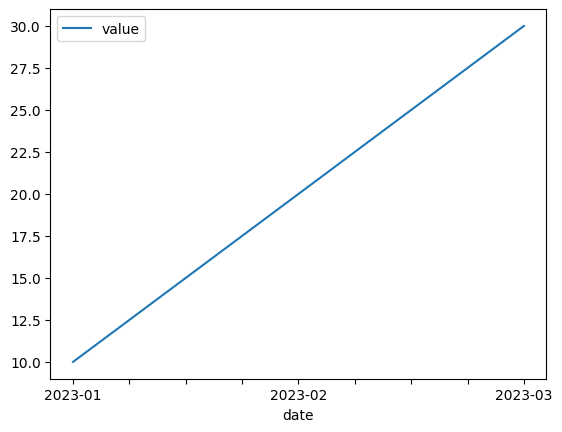

In [3]:
df_plotted = df.plot(x='date', y='value')

# 42
How would you create a bar plot of group counts after a groupby operation?

In [4]:
df = pd.DataFrame({'dept': ['HR', 'IT', 'HR', 'IT', 'HR'], 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']})

In [6]:
df_grouped = df.groupby('dept')['name'].count()

<Axes: xlabel='dept'>

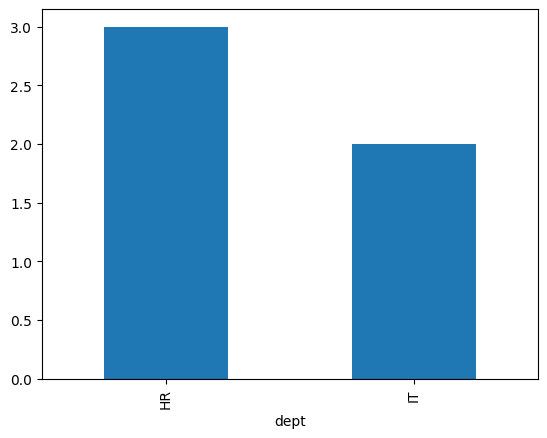

In [8]:
df_grouped.plot.bar()

# 43
How can you use pandas to plot a histogram of a numerical column with custom bins?

In [11]:
df = pd.DataFrame({'score': [55, 65, 75, 85, 95, 60, 70]})

In [12]:
bins = [50, 60, 70, 80, 90, 100]

<function matplotlib.pyplot.show(close=None, block=None)>

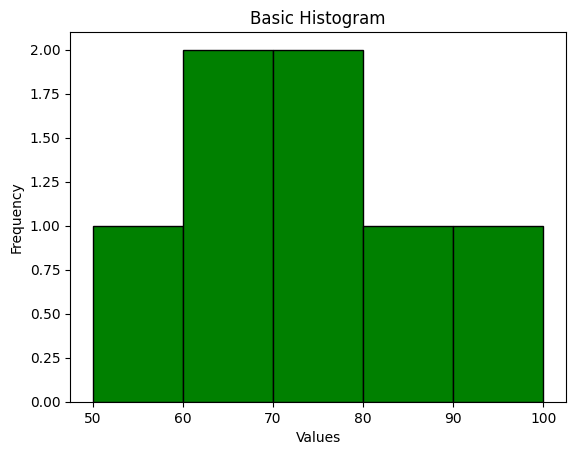

In [15]:
plt.hist(df, bins=bins, color='green', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show

# 44
How would you create a scatter plot of two columns with different colors for each category?

In [26]:
import numpy as np

In [19]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [10, 20, 25, 30, 35], 'category': ['A', 'B', 'A', 'B', 'A']})

In [29]:
categories = df['category'].unique()

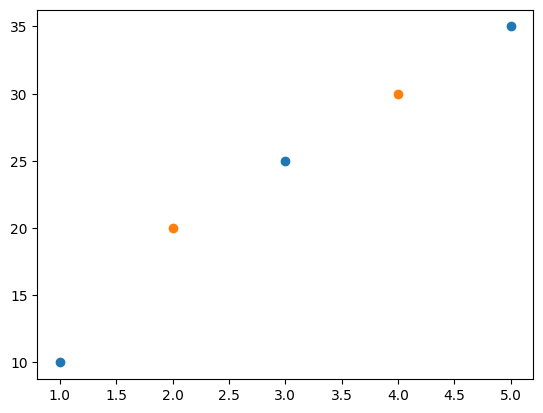

In [30]:
for category in categories:
    subset = df[df['category'] == category]
    plt.scatter(subset['x'], subset['y'], label=category)

# 45
How do you create a box plot for a DataFrame column grouped by another column?

In [34]:
df = pd.DataFrame({'dept': ['HR', 'IT', 'HR', 'IT', 'HR'], 'salary': [50000, 60000, 55000, 65000, 52000]})

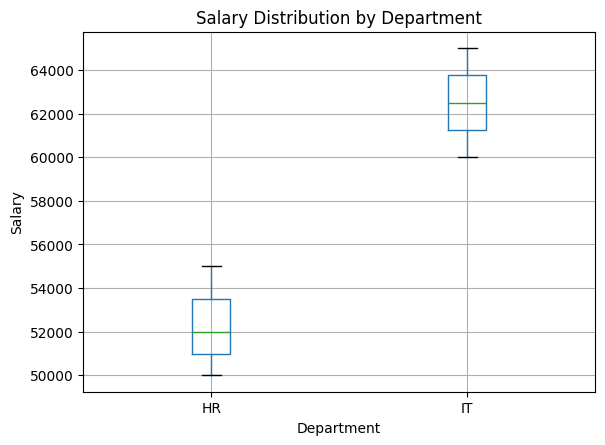

In [42]:
df.boxplot(column='salary', by='dept')
plt.title('Salary Distribution by Department')
plt.suptitle('')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

# 46
How would you plot multiple columns of a DataFrame as lines on the same plot with a legend?

In [81]:
df = pd.DataFrame({'date': ['2023-01', '2023-02', '2023-03'], 'A': [25, 15, 20], 'B': [17, 20, 15]})

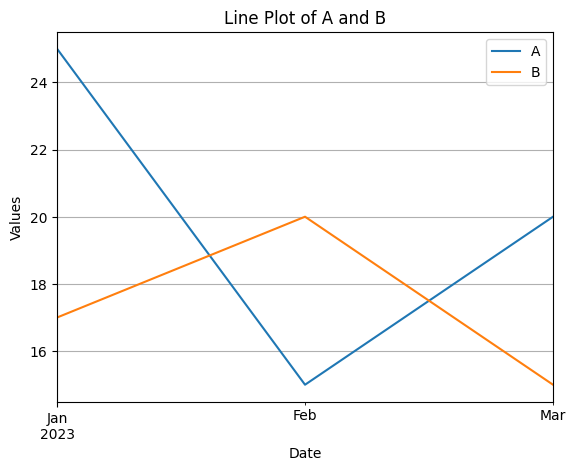

In [82]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.plot()
plt.legend(loc=0)

plt.title('Line Plot of A and B')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# 47
How can you customize the title, labels, and style of a pandas plot?

In [108]:
df = pd.DataFrame({'date': ['2023-01', '2023-02', '2023-03'], 'value': [10, 20, 30]})

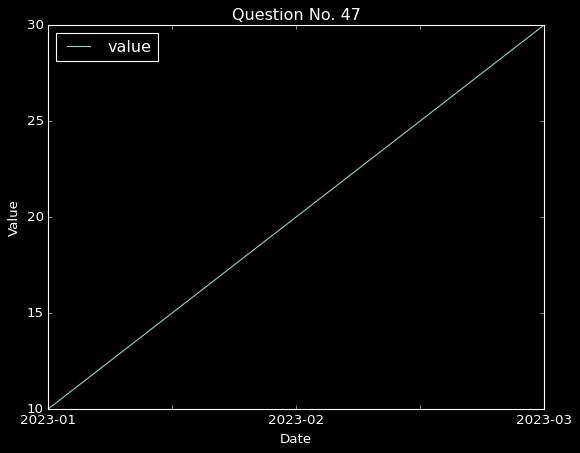

In [109]:
df.set_index('date', inplace=True)
plt.style.use('dark_background')
df.plot()

plt.title('Question No. 47')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [93]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
